# Name : Tharindu O.K.D
# Index No. : 190622R

Question 01

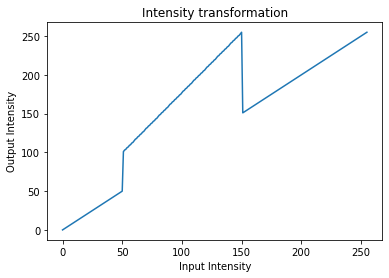

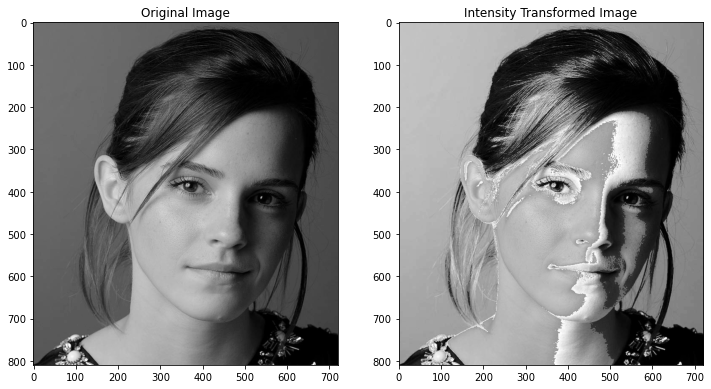

In [16]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

array_1 = np.array([ i for i in range(0,51)])
array_2 = np.array([ (155 / 100) * (i - 50) + 100 for i in range(51,151)])
array_3 = np.array([i for i in range(151,256)])
transform = np.concatenate((array_1, array_2, array_3),axis=0).astype(np.uint8)

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_title("Intensity transformation")
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")

im = cv.imread(r"emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert im is not None

transformed_image = cv.LUT(im, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(transformed_image, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Intensity Transformed Image")
plt.show()


Question 02

Text(0.5, 1.0, 'Accentuated White Matter')

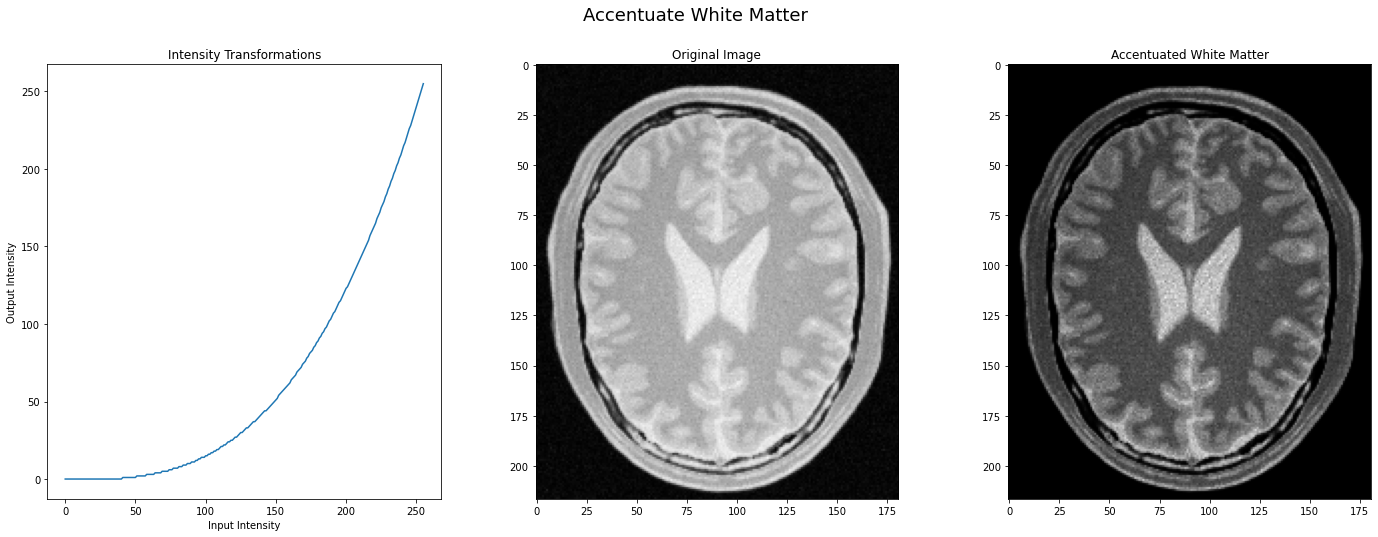

In [34]:
im = cv.imread(r"brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert im is not None

# accentuate white matter
white_transform = np.array([((i / 255) ** 3) * 255 for i in range(0,256)],dtype=np.uint8)
white_transformed_image = cv.LUT(im, white_transform)
fig, ax = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle("Accentuate White Matter", fontsize=18)
ax[0].plot(white_transform)
ax[0].set_title("Intensity Transformations")
ax[0].set_xlabel("Input Intensity")
ax[0].set_ylabel("Output Intensity")
ax[1].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Original Image")
ax[2].imshow(white_transformed_image, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("Accentuated White Matter")

Text(0.5, 1.0, 'Accentuated Gray Matter')

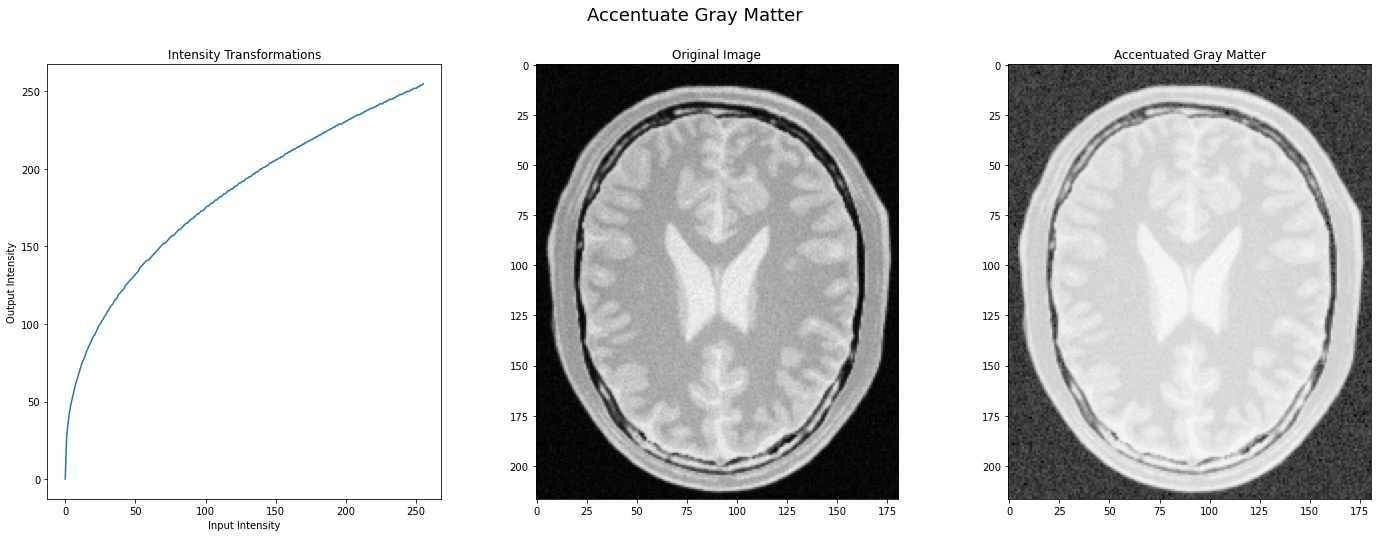

In [36]:
gray_transform = np.array([((i / 255) ** 0.4) * 255 for i in range(0,256)],dtype=np.uint8)
gray_transformed_image = cv.LUT(im, gray_transform)
fig, ax = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle("Accentuate Gray Matter", fontsize=18)
ax[0].plot(gray_transform)
ax[0].set_title("Intensity Transformations")
ax[0].set_xlabel("Input Intensity")
ax[0].set_ylabel("Output Intensity")
ax[1].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Original Image")
ax[2].imshow(gray_transformed_image, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("Accentuated Gray Matter")